In [1]:
# https://github.com/voila-gallery/voila-spotify/blob/master/Spotify_viewer.ipynb

import pandas as pd
import os, json, datetime
import matplotlib.pyplot as plt
import spotify_fcns as sfy
from calendar import monthrange
import numpy as np
from sklearn.preprocessing import MinMaxScaler

week_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
full_weekdays = {'Sun': 'Sunday', 'Mon': 'Monday', 'Tue': 'Tuesday', 
                 'Wed': 'Wednesday', 'Thu': 'Thursday', 'Fri': 'Friday', 'Sat': 'Saturday'}
months = ['', 'January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

plt.rcParams['font.size'] = 14

tzd = -6

# for multiple files from different downloads, find way to join then

In [6]:
sp_df = sfy.getData('MyData3')
sp_df

4900 plays found across 1 files.


,endTime,artistName,trackName,msPlayed
0,2021-01-01 20:02,OneRepublic,Better,204386
1,2021-01-01 20:05,OneRepublic,Love Runs Out,224226
2,2021-01-01 20:09,Axwell /\ Ingrosso,More Than You Know,203000
3,2021-01-01 20:13,Stromae,ave cesaria,249520
4,2021-01-01 20:15,Panic! At The Disco,Emperor's New Clothes,158666
...,...,...,...,...
4895,2021-09-18 22:46,OneRepublic,Someday,187888
4896,2021-09-18 22:49,Duncan Laurence,Arcade,183624
4897,2021-09-18 22:51,The Lumineers,Ophelia,160097
4898,2021-09-18 22:55,The Lumineers,Angela,201785


# Simple Statistics

In [7]:
artist_counts = sp_df['artistName'].value_counts()
artist_counts[ artist_counts > 20 ]

Justin Timberlake      861
OneRepublic            687
Imagine Dragons        394
Taylor Swift           322
Shawn Mendes           252
Bastille               192
Stromae                161
Panic! At The Disco    124
Ed Sheeran             108
Gym Class Heroes        70
Charlie Puth            70
Jon Bellion             70
Twenty One Pilots       67
George Ezra             64
Axwell /\ Ingrosso      57
Fall Out Boy            51
Train                   48
Ryan Tedder             48
Gavin DeGraw            45
The Script              40
Zedd                    39
The Weeknd              37
flor                    35
Beyoncé                 33
Dj Esli                 31
Kygo                    31
Phillip Phillips        31
Calvin Harris           31
Unknown Artist          31
Maroon 5                30
The Wanted              28
Avicii                  28
The Lumineers           27
Travie McCoy            26
Billy Joel              26
Distractible            25
Marshmello              25
A

In [41]:
# Old
track_counts = sp_df['trackName'].value_counts()
track_counts[ track_counts > 10 ].head(10)
# New
df = sp_df.groupby(['artistName', 'trackName'])['msPlayed'].count().reset_index()
df = df.sort_values(by='msPlayed', ascending=False)
df.columns = ['Artist', 'Track', 'Plays']
df = df[['Track', 'Artist', 'Plays']]
df.head()

,Track,Artist,Plays
235,Follow You,Imagine Dragons,126
330,TKO,Justin Timberlake,105
308,Mirrors,Justin Timberlake,97
454,Run,OneRepublic,88
300,Livin' Off the Land,Justin Timberlake,85


In [10]:
sp_df['msPlayed'].sum() / 1000 / 60 # minutes

19129.6298

In [11]:
sp_df[ sp_df['artistName'] == 'OneRepublic' ]['msPlayed'].sum() / 1000 / 60 # minutes

2320.3095000000003

In [12]:
# minutes played
(sp_df.groupby(['artistName'])['msPlayed'].sum() / 1000 / 60).sort_values(ascending=False)[:15]

artistName
Justin Timberlake      4530.513867
OneRepublic            2320.309500
Imagine Dragons        1224.097050
Taylor Swift           1212.675567
Distractible           1057.153317
Shawn Mendes            786.719317
Stromae                 609.686350
Bastille                593.604467
Panic! At The Disco     367.707633
Ed Sheeran              366.262617
Gym Class Heroes        256.323667
Jon Bellion             249.770850
Charlie Puth            238.766000
Twenty One Pilots       235.716050
George Ezra             216.381817
Name: msPlayed, dtype: float64

In [13]:
sp_df[ sp_df['artistName'] == 'Justin Timberlake' ]['trackName'].value_counts()

TKO                                                               105
Mirrors                                                            97
Livin' Off the Land                                                85
Higher Higher                                                      70
Rock Your Body                                                     67
Supplies                                                           51
Señorita                                                           46
Say Something (feat. Chris Stapleton)                              31
Cry Me a River                                                     28
LoveStoned / I Think She Knows (Interlude)                         27
My Love (feat. T.I.)                                               26
Nothin' Else                                                       24
Drink You Away                                                     19
Suit & Tie (feat. Jay-Z)                                           18
Man of the Woods    

# Adding Columns

In [14]:
sp_df['Month'] = sp_df['endTime'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')+datetime.timedelta(hours=tzd)).month)
sp_df['Date'] = sp_df['endTime'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')+datetime.timedelta(hours=tzd)).day)
sp_df['Year'] = sp_df['endTime'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')+datetime.timedelta(hours=tzd)).year)
sp_df['Day'] = sp_df['endTime'].apply(lambda x: week_days[(datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')+datetime.timedelta(hours=tzd)).weekday()])
sp_df['Hour'] = sp_df['endTime'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')+datetime.timedelta(hours=tzd)).hour)
sp_df

,endTime,artistName,trackName,msPlayed,Month,Date,Year,Day,Hour
0,2021-01-01 20:02,OneRepublic,Better,204386,1,1,2021,Fri,14
1,2021-01-01 20:05,OneRepublic,Love Runs Out,224226,1,1,2021,Fri,14
2,2021-01-01 20:09,Axwell /\ Ingrosso,More Than You Know,203000,1,1,2021,Fri,14
3,2021-01-01 20:13,Stromae,ave cesaria,249520,1,1,2021,Fri,14
4,2021-01-01 20:15,Panic! At The Disco,Emperor's New Clothes,158666,1,1,2021,Fri,14
...,...,...,...,...,...,...,...,...,...
4895,2021-09-18 22:46,OneRepublic,Someday,187888,9,18,2021,Sat,16
4896,2021-09-18 22:49,Duncan Laurence,Arcade,183624,9,18,2021,Sat,16
4897,2021-09-18 22:51,The Lumineers,Ophelia,160097,9,18,2021,Sat,16
4898,2021-09-18 22:55,The Lumineers,Angela,201785,9,18,2021,Sat,16


# Visualizations

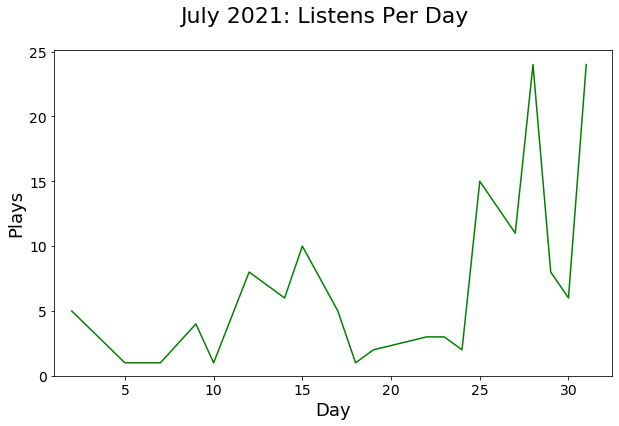

In [17]:
sfy.listensPerDay(sp_df, 7, 2021);

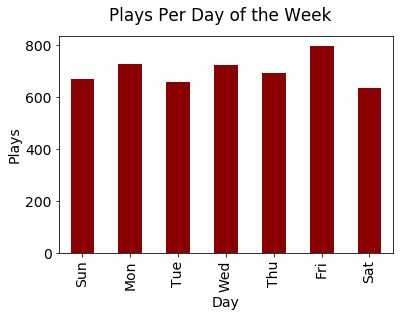

In [18]:
# plays per day of week
sfy.playsDayWeek(sp_df);

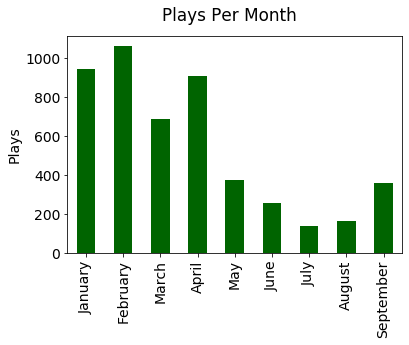

In [19]:
# total per month
sfy.totalMonth(sp_df);

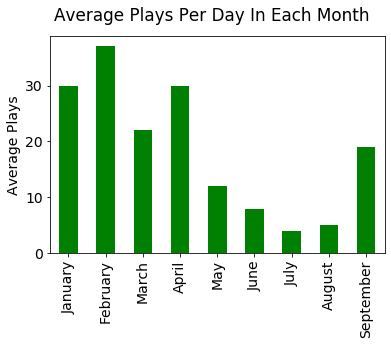

In [20]:
# average per day per month
sfy.avgDayPerMonth(sp_df);

In [21]:
# plays/time per day

# total number of days
stt = datetime.datetime.strptime(sp_df.loc[0]['endTime'].split()[0], '%Y-%m-%d')
end = datetime.datetime.strptime(sp_df.loc[len(sp_df)-1]['endTime'].split()[0], '%Y-%m-%d')
# (end-stt).days # total days

# minutes per day
minutes = sp_df['msPlayed'].sum() / 1000 / 60
minutes_per_day = minutes / (end-stt).days
print("{:.2f} minutes per day".format(minutes_per_day))

# plays per day
plays_per_day = len(sp_df) / (end-stt).days
print("{:.1f} plays per day".format(plays_per_day))

73.58 minutes per day
18.8 plays per day


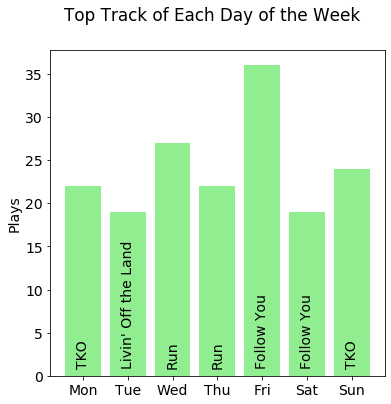

In [22]:
# top tracks by day of week
sfy.topTrackByDay(sp_df);

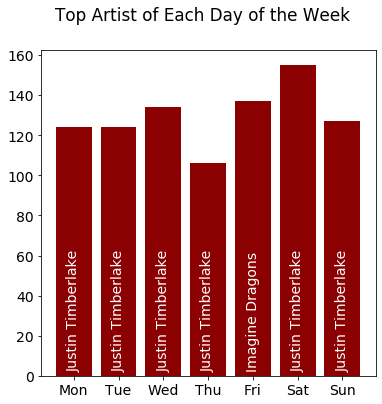

In [23]:
# top artist(s) by day of week
sfy.topArtistByDay(sp_df);

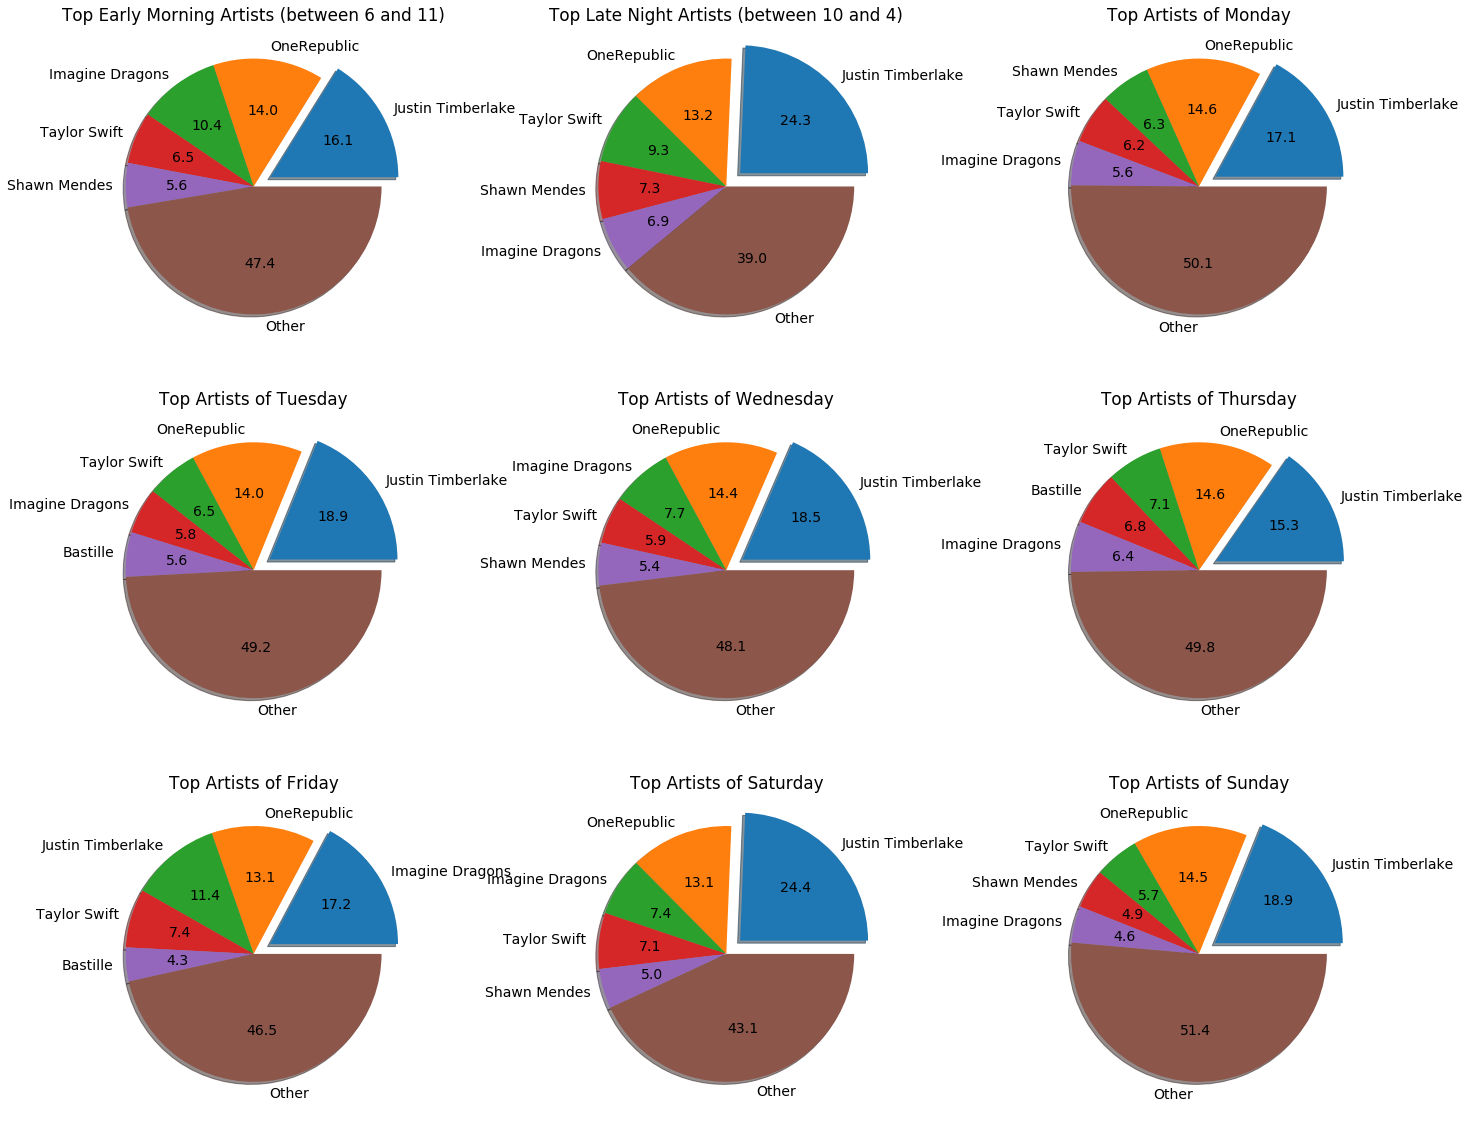

In [24]:
# top artist(s) by day of week
sfy.topArtistByDayPie(sp_df);

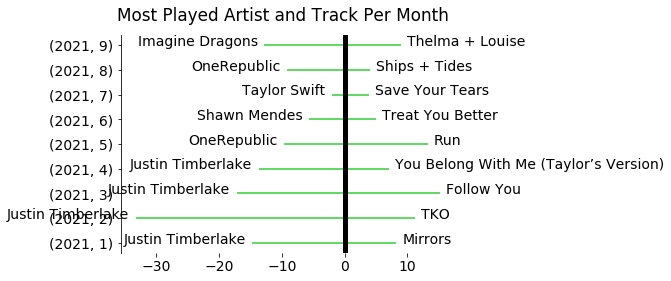

In [25]:
# top artist and track for each month

tr_gb = sp_df.groupby(['Year', 'Month'])['trackName'].value_counts()
ar_gb = sp_df.groupby(['Year', 'Month'])['artistName'].value_counts()

months = pd.unique(list(zip(sp_df['Year'], sp_df['Month'])))# [::-1]
artists = [ar_gb[m].index[0] for m in months]
ap = pd.Series([ar_gb[m][0] for m in months])
tracks = [tr_gb[m].index[0] for m in months]
tp = pd.Series([tr_gb[m][0] for m in months])

ap = ap * -1 / 10
tp = tp / 5

# plot
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.axvline(x=0, c='black', linewidth=5) # vertical line at 0
plt.hlines(list(range(len(months))), ap, tp, color='limegreen') # plot horizontal lines
plt.yticks(list(range(len(months))), months)
# plt.xticks([], [])
plt.suptitle('Most Played Artist and Track Per Month')

for i, m_d in enumerate(months):
    ax.annotate(tracks[i], xy=(tp[i], i), xytext=(tp[i]+1, i))
    ax.annotate(artists[i], xy=(ap[i], i), xytext=(ap[i]-1, i), ha='right') # xy for end?
    

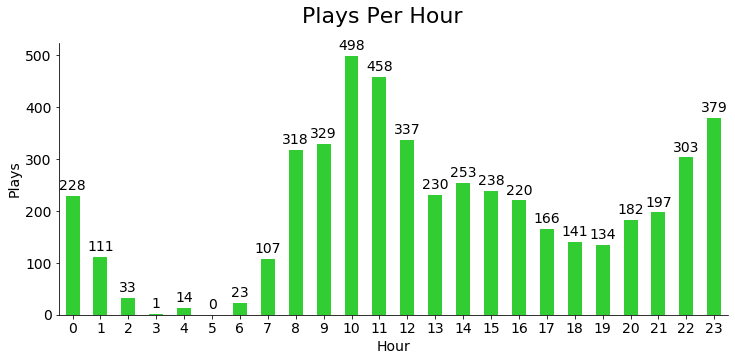

In [26]:
# plays by hour
sfy.playsByHour(sp_df);

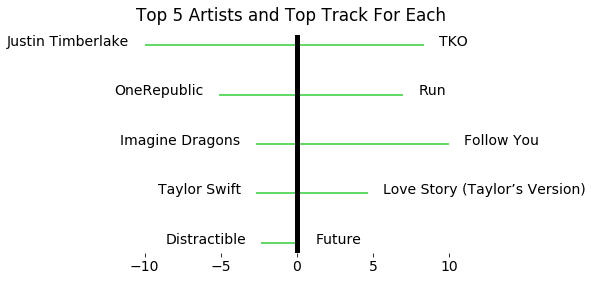

In [27]:
# similar stem/timeline for artists and top song by them

# other possible idea
# two bar plots
# 'Top x Artists' on left
# top song by artist on right

a_gb = sp_df.groupby('artistName')
ar_gb = sp_df.groupby(['artistName', 'trackName'])

# left
top_5_artists = (a_gb['msPlayed'].sum() / 1000 / 60 / 60).sort_values(ascending=False)[:5][::-1] # hours
a_gb['msPlayed'].count().sort_values(ascending=False) # plays
top_5_artists_i = top_5_artists.index

# right
ar_gb['msPlayed'].sum() / 1000 / 60 / 60
right = ar_gb['msPlayed'].count()

track_plays = []
top_tracks = []
for artist in top_5_artists.index:
    track_plays.append(right.loc[artist].sort_values(ascending=False)[0])
    top_tracks.append(right.loc[artist].sort_values(ascending=False).index[0])

# scale all values to 0 to 10 range
#scaler = MinMaxScaler(feature_range=(0,10))
#track_plays = scaler.fit_transform(np.array(track_plays).reshape(-1,1))

#scaler = MinMaxScaler(feature_range=(0,10))
#top_5_artists = scaler.fit_transform(np.array(top_5_artists).reshape(-1,1))

m = np.array(track_plays).max()
track_plays = np.array(track_plays) / (m * 0.1)

top_5_artists = top_5_artists / (top_5_artists.max() * 0.1)

# plot
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.axvline(x=0, c='black', linewidth=5) # vertical line at 0
plt.hlines(list(range(5)), top_5_artists*-1, track_plays, color='limegreen') # plot horizontal lines

plt.yticks([], [])
# plt.xticks([], []) # use this to center around 0
plt.suptitle('Top 5 Artists and Top Track For Each')

for i, m_d in enumerate(range(5)):
    ax.annotate(top_tracks[i], xy=(track_plays[i], i), xytext=(track_plays[i]+1, i))
    ax.annotate(top_5_artists_i[i], xy=(top_5_artists[i]*-1, i), xytext=((top_5_artists[i]*-1)-1, i), ha='right') # xy for end?

In [21]:
# same with snapchat data?
# longest streak of listening to an artist everyday
# Most plays of a song in a day - top 10?
# something with podcasts?